<a href="https://colab.research.google.com/github/P4CSS/PSS/blob/master/P01_Counting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P01-Counting

* [Slide: Py01 Counting](https://docs.google.com/presentation/d/e/2PACX-1vT9xw6FZzdlR1QcXHZe-bQ8eeYftltAAutHPNTyyMcLkevEr2bHOBfrpaaZpMaTb1gb1ufUX00jeu8w/pub?start=false&loop=false&delayms=3000)
* [Github Repo](https://github.com/P4CSS/PSS) 

## 計數

寫程式是模仿你解決問題的邏輯，讓電腦幫你重複做，大量的做。因此，重要的是你解決問題的邏輯。例如計數／計量（Counting）就是一個簡單且實用的演算法邏輯。計數的程式邏輯目標是計算一堆物件中，每個物件各有幾個。相關範例有：

* 全班有這麼多人，我想算算每個科系有多少人，好知道系所比例安排專題。
* 我被當好人跑腿，幫全班買飲料。但現在飲料品項很多，且有糖量、冰量的選擇，通常會逐一詢問後，逐一登記眾人所提出來的品項，有重複的畫正字記號累計。
* 在統計中常見的狀況是依照`[0, 10)`、`[10, 20)`依此類推計算學生的成績分布。
* 在社會科學中常見的狀況是，計算某一篇文章裡面，每個詞出現幾次（詞頻）？

以下這個例子將帶你從最基礎的語法，用Python最基礎的資料型態來「計數（counting）」。

### 計數的任務定義

「考慮一個狀況，有一個跟一座山一樣多的水果，不知道有幾種水果，也不知道有幾顆，你必須要數出各種水果有幾顆，你會怎麼數？」

### 運算思維思考

* 首先你會有一列水果（物品）：A(pple), B(anana), C(herry), G(rapes), A, A, G, C, G, O(range), O, ..
* **想想若你在數水果實際上你是怎麼數？** 會從第一顆開始，一顆一顆地數，數到結束為止（水果有幾顆，就得數幾次）。
* **那你怎麼記住哪一種水果有幾顆？** 拿出一張紙，看到一種沒看過的水果，就新增一個「對應」，將水果名稱對應到0，然後在對應的欄位數值遞增一。若已經看過該水果，那就直接找到那個欄位遞增一即可。

    ```
    iteration= 1, A, A: 1
    iteration= 2, B, A: 1, B: 1
    iteration= 3, C, A: 1, B: 1, C: 1
    iteration= 4, G, A: 1, B: 1, C: 1, G: 1
    iteration= 5, A, A: 2, B: 1, C: 1, G: 1
    iteration= 6, A, A: 3, B: 1, C: 1, G: 1
    iteration= 7, G, A: 3, B: 1, C: 1, G: 2
    iteration= 8, C, A: 3, B: 1, C: 2, G: 2
    iteration= 9, G, A: 3, B: 1, C: 2, G: 3
    iteration=10, O, A: 3, B: 1, C: 2, G: 3, O: 1
    iteration=11, O, A: 3, B: 1, C: 2, G: 3, O: 2
    ```

#### 用比較接近程式邏輯的方式來思考

1. 先拿出一張紙做對應表， 左一行要寫水果名，右一行為他所對應到的水果數量
2. 把水果排成一列準備一個一個數
3. 對籃子裡的每一顆水果，逐一開始數：
    * 如果沒看過該種水果
        * 就在對應表記下該種水果，登記該水果為1顆。
    * 若有看過該種水果
        * 就把對應表上的那種水果所對應到的數字加1。

#### 用英文來撰寫上述的邏輯思考

程式語言的邏輯事實上和要解決問題的邏輯表述很像，連文字和關鍵字都很像。包含if-else（如果滿足條件就怎樣，不然就怎樣）等條件判斷結構，和`for a in alist`對於`alist`中的每個元素。

1. Build a **look-up table**to record each fruit and number of the fruit(calls it dictionary), naming as `fruit_count`
2. Keep all fruits in a **list** named `fruit_list`
3. **For each** `fruit` in `fruit_list`: 
    * If the fruit does not appear in `fruit_count`
        * Create a mapping in `fruit_count` to map the `fruit` name to 1
    * else
        * increase the mapped value of the `fruit` name in `fruit_count`      

<div class="alert alert-block alert-info">
<b>別的程式語言會怎麼做？</b> 如果是Google Sheet或Excel要做到這件事的話，要先用`unique()`找出相異的data value，然後用`countif()`函式來計算，每個相異值個別出現過幾次。作法如<a href="https://paper.dropbox.com/doc/Excel-skills--AMhtEb1RwJRKglJS17HxOonIAQ-oFgGCjW9W1m7UXBsdq6UG">Excel skills: How do I get the distinct/uniq</a>。如果你是用R來處理的話，那就會是`count(vec)`。
</div>

### Convert to Python

將上述用英文撰寫的程式邏輯改用Python語法來撰寫程式碼如下。其中包含了Dict(ionary)、List的資料結構和變數、以及for-loop反覆迴圈邏輯和if-else的條件式判斷。


In [2]:
# Create an empty Dict(ionry) to store the key to value pairs
# Assign an empty Dict(ionry) to a variable 'fruit_count'
fruit_count = {}

# Create a list to store all things to count
# Assign the List with value to a new variable 'fruit_list'
fruit_list = ['apple', 'apple', 'banana', 'apple', 'banana', 'grape', 'banana', 'apple'] # A list of fruit

# For each fruit in the list...
for fruit in fruit_list:
    if fruit not in fruit_count:
        fruit_count[fruit] = 1
    else:
        fruit_count[fruit] = fruit_count[fruit] + 1

print(fruit_count)

{'apple': 4, 'banana': 3, 'grape': 1}


在上述程式碼中，有幾個重要的概念

#### Assignment
* `=`稱為Assignment，將右側的數據Assign給左側的變數。
* 例如`fruit_count = {}`即是把一個空的`Dict`(tionary) Assign給左側的變項`fruit_count`。
* 例如`fruit_list = ['apple', 'apple', 'banana', 'apple', 'banana', 'grape', 'banana', 'apple']`便是把一列的水果名（字串）Assign給左側的變項`fruit_list`。 

#### List資料型態（資料結構）
* **Def**: List是一種有序結構，可以用整數作為索引來存取，從0開始編號，第0個、第1個、第2個。
* **Access(Read)**: 可以用小於List長度的整數作為索引來取出List中的某個值，例如一個比較簡短的例子`alist = ['a', 'b', 'c']`中，`alist[0]`的值為`'a'`，`alist[2]`的值為`'c'`。
* **Access(Write)**: 也可以用Assign覆寫List中某個元素值，例如`alist[2]=3`，那麼`alist[2]`的值就不再是`'c'`，而是`3`。

#### Dict資料型態
* **Def**: Dict(tionary)是一種無序（Unordered）的鍵值（key-to-value）對應結構結構。如`adict = {'a': 1, 'b': 2}`。
* **Access(Read)**: 要知道Dict的某個key是mapping到哪一個value的話，亦是用`[]`來讀取，如上例`adict['a']`的值為1。
* **Access(Write)**`fruit_count[fruit] = 1`是用來將值Assign給Dict某個key，承上例，如果`adict['a'] = 3`後再讀取一次`adict['a']`的值，便會是3。

#### Iteration: for
* **Def**: 這裡的for比較像是for-each的概念。`for fruit in fruit_list:`的意思是，依序將`fruit_list`中的每一個值，assign給`fruit`；簡而言之，`fruit`這個變項會走訪過每個`fruit_list`中的值。
* for-loop中所要反覆執行的程式碼，必須向右多一個tab。


#### Condition: if, else
* `if...else`表示式的意義如英文字，如果滿足前述條件的話，就做什麼事，不然的話（else），就做什麼事。
* if判斷式中，符合條件或不符合條件（else）所要執行的程式碼，亦必須向右多一個tab。
* 因此，綜合本程式範例的Iteration和Condition，程式碼會縮排成這個樣子
```
for fruit in fruit_list:
    if fruit not in fruit_count:
        fruit_count[fruit] = 1
    else:
        fruit_count[fruit] = fruit_count[fruit] + 1
```

#### Incremental
* `a = a + 1`是一種遞增運算，將原本的`a`加上1後Assign給原本的`a`，除了會覆蓋掉原本`a`的數值外，相當於將`a`遞增一。
* `fruit_count[fruit] = fruit_count[fruit] + 1`即是將某種`fruit`作為key所對應到的Dict值遞增一。



## Printing

在前面我們介紹到兩種Python中非常重要的資料型態，寫程式過程經常會需要把這些變數或資料給列印出來看看，看是否資料處理是否照自己的邏輯走。

### 印出整個變數內容

如果是印出整個變數內容的話，那幾乎是差不多的，就直接用`print()`函式列印出該變數即可。如果沒有加上`print()`函式也會印出該變數的內容，但同一個cell，如果有多個變數在列，那只會印出最後一個，如下面的例子中，我希望印出`fruit_list`和`fruit_count`，在沒有用`print()`的狀況下，只會印出最後一個。
* `{'apple': 4, 'banana': 3, 'grape': 1}`這種從key-to-value對應形態的資料稱之為`Dictionary`
* `['apple', 'apple', 'banana', 'apple']`這種從0開始編號起，第0個、第1個、第2個的資料型態稱之為`List`。

In [4]:
# print out fruit_list for observation
print(fruit_list)

# print out fruit_count
print(fruit_count)

# print out fruit_list
fruit_list

# print out fruit_count
fruit_count

['apple', 'apple', 'banana', 'apple', 'banana', 'grape', 'banana', 'apple']
{'apple': 4, 'banana': 3, 'grape': 1}


{'apple': 4, 'banana': 3, 'grape': 1}

### 印出Dict中的所有Key或Value

`Dictionary`既然稱之為一種key-to-value鍵值對應形態的資料，那這種資料型態就應該會有一群keys，然後每個keys對應至唯一的values，不會有一個keys對應到多個values的情形。
- `keys()`可以傳回一個dictionary的所有keys
- `values()`可以傳回一個dictionary的所有values
- `items()`可傳回一個dictionary的所有key-to-value pairs，以`(key1, value1), (key2, value2)`的型態。

In [ ]:
# Print the dictionary
print(fruit_count)

# Print all keys
print(fruit_count.keys())

# Print all values mapped by keys
print(fruit_count.values())

# Print all key-to-value pairs
print(fruit_count.items())


{'apple': 4, 'banana': 3, 'grape': 1}
dict_keys(['apple', 'banana', 'grape'])
dict_values([4, 3, 1])
dict_items([('apple', 4), ('banana', 3), ('grape', 1)])


### 印出List中的每個項目

將List中每個項目依序印出非常容易，就只要把它當for-each指令，然後用`print()`函式印出即可。





In [5]:
for fruit in fruit_list:
    print(fruit)

apple
apple
banana
apple
banana
grape
banana
apple


### 印出Dict中的每個鍵值對

因為Dict是一個鍵值對應（key-to-value mapping）結構，所以要先想好，要印的是key還是value。但通常是

In [10]:
for k in fruit_count:
    print(k, "\t", fruit_count[k])
#     print(key, fruit_count[key])

apple 	 4
banana 	 3
grape 	 1


In [ ]:
for k, v in fruit_count.items():
    print(k, "\t", v)
    

apple 	 4
banana 	 3
grape 	 1


## 計數的其他邏輯與語法

### V1. Using list.count(key) to count the frequency of something

用`list.count(x)`函式可以計算出一個List中為x的有多少個。所以，只要知道有多少種物件，就可以用`list.count(x)`來計算每種物件的數量。（註：`list.count(x)`的寫法，表示`list`類別中有一個成員函式（Member function）為`count(x)`，可以計算List類別中某個物件的數量。）

In [7]:
fruit_list.count("apple")

4

因此，也可以走訪過所有物件，當遇到沒看過的物件時，便計算一下在該list中有幾個該物件，如果有計算過該物件了，便略過之。用Python來表示這樣的程式邏輯結果如下。

In [ ]:
fruit_count = {} # dictionary, key to value pairs

fruit_list = ['apple', 'apple', 'banana', 'apple', 'banana', 'grape', 'banana', 'apple'] # A list of fruit

for fruit in fruit_list:
    if fruit not in fruit_count:
        fruit_count[fruit] = fruit_list.count(fruit)
print(fruit_count)

{'apple': 4, 'banana': 3, 'grape': 1}


### V2. Using set(fruit_list) to gaurantee unique value in the list¶

前一個範例中引入了`list`類別的成員函式`count()`來計算List中某個物件的數量。但仍須要用if-not-in這樣的判斷式來判斷每個物件是否已經計算過數量。那有沒有辦法取出某個List中有哪些種類的物件？有的，可以用`set(alist)`這樣的集合函式來取出某個List中所有的物件種類。亦即某個List `alist`其實是由`set(alist)`所組成的。`set(alist)`中不會有重複的元素。這個網站PythoTutor可以視覺化程式邏輯的運作流程，可以幫助了解計數的意涵[Visualized by PythonTutor](http://pythontutor.com/visualize.html#code=fruit_list%20%3D%20%5B'apple',%20'apple',%20'banana',%20'apple',%20'banana',%20'grape',%20'banana',%20'apple'%5D%0Afruit_count%20%3D%20%7B%7D%0Afor%20k%20in%20set%28fruit_list%29%3A%0A%20%20%20%20fruit_count%5Bk%5D%20%3D%20fruit_list.count%28k%29%0Aprint%28fruit_count%29&cumulative=false&curInstr=10&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)。

如下例。雖然`fruit_list`中的重複物件可能很多，但如果取`set(fruit_list)`的話，僅會列出`fruilt_list`中的不重複物件。此時，只需要用for-loop把`set(fruit_list)`中的每種物件都屬過一次各有幾個，便可以知道每種物件出現幾次。

<div class="alert alert-block alert-info">
至此，我們一共講述了三種不一樣的結構，<b>List</b>、<b>Dict(ionary)</b>、<b>Set</b>。
</div>

In [9]:
set(fruit_list)

{'apple', 'banana', 'grape'}

In [ ]:
fruit_count = {}
for k in set(fruit_list):
    fruit_count[k] = fruit_list.count(k)
print(fruit_count)

{'apple': 4, 'grape': 1, 'banana': 3}


### V3. by Comprehensive dictionary

Python有一套很特別的、稱為Comprehension的寫法，可以將上述的迴圈式子寫成單一指令的模樣如下。可以查找網路上「Python Comprehension」獲得範例與說明。常用Python的工程師也常會用Comprehension的方式來寫作，尤其是做資料分析的工程師。

In [ ]:
fruit_count = {k:fruit_list.count(k) for k in set(fruit_list)}
print(fruit_count)

{'apple': 4, 'grape': 1, 'banana': 3}


### V4. by `Counter()`

最後一個方法是我最愛用的方法，利用了`Collections`這個容器資料型態。`Collections`底下包含了`Counter()`這個Dict的子類別，可用來計算可雜湊 (hashable) 物件的數量。只要直接用`Counter(fruit_list)`便可以計算該List中每種物件的數量。

不過該函式不會在Python一啟動的時候就自動載入。所以需要先載入`from collections import Counter`。[Visualized by PythonTutor](http://pythontutor.com/visualize.html#code=from%20collections%20import%20Counter%0Afruit_list%20%3D%20%5B'apple',%20'apple',%20'banana',%20'apple',%20'banana',%20'grape',%20'banana',%20'apple'%5D%20%23%20A%20list%20of%20fruit%0Afruit_count%20%3D%20Counter%28fruit_list%29%0Afor%20k,%20v,%20in%20fruit_count.items%28%29%3A%0A%20%20%20%20print%28k,%20%22%5Ct%22,%20v%29&cumulative=false&curInstr=9&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [11]:
from collections import Counter

fruit_list = ['apple', 'apple', 'banana', 'apple', 'banana', 'grape', 'banana', 'apple'] # A list of fruit
fruit_count = Counter(fruit_list)
for k, v, in fruit_count.items():
    print(k, "\t", v)

apple 	 4
banana 	 3
grape 	 1


## Counting Applications

### 案例：計算班級中各系人數

這個例子和數水果幾乎一模一樣，只是把水果種類換成每個學生的科系而已。但下面用了一個不同的思考，先將`stu_list`掃過一遍，將所有的key都先找出來，並對應到0。然後再用第二個for-loop將所有項目利用遞增運算子計算一遍。

`stu_dict[student] += 1`的寫法和`stu_dict[student] =  stu_dict[student] + 1`的意義是相同的，為了避免冗長，所以多了一個這樣的運算子。

In [13]:
stu_dict = {}
stu_list = ["soc", "soc", "econ", "bio", "psy", "psy", "econ", "poli", "econ"]

for student in stu_list:
    stu_dict[student] = 0
for student in stu_list:
    stu_dict[student] += 1
print(stu_dict)

{'soc': 2, 'econ': 3, 'bio': 1, 'psy': 2, 'poli': 1}


### 案例：計算Wikipedia文章詞頻

「計數」其實是很多程式會應用到的演算邏輯。其他的演算邏輯單元還包含搜尋、排序等等，這些都是運算思維的一部分。在這個例子中，我打算要用計數邏輯來計算一篇Wikipedia文章的詞頻（Term frequency），亦即該篇文章中每個字出現幾遍，相當於把字詞當成上述範例中的水果。因此，一開始我需要把一篇文章斷開成單詞並存成如前面例子中的List。我會用Python的Wikipedia套件來取得某個Wikipedia頁面的摘要，這個套件為第三方套件，通常你的電腦都還沒安裝過這個套件，所以你需要在Terminal.app或cmd.exe中用`pip install wikipedia`安裝這個套件。用wikipedia的函式把某頁wikipedia的內容抓少許回來後，要先把該篇文章拆成字（用`str.split()`）。然後再用前面教的方法來計算每個字的出現次數。


In [ ]:
!pip install wikipedia  # install a new third-party library

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp37-none-any.whl size=11686 sha256=bf7d6d2d9a8691c604b66a95b2826405a9f7557fa8615856bd0246bcd5c3eb16
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


#### Obtaining some qurery result from wikipedia

In [16]:
import wikipedia    # import a 3rd-party library into runtime
string_a  = wikipedia.summary("Big_data", sentences = 10)   # get data by 3rd-party function
print(type(string_a))
print(string_a)
# string_a = "In 2004, Obama received national attention during his campaign to represent Illinois in the United States Senate with his victory in the March Democratic Party primary, his keynote address at the Democratic National Convention in July, and his election to the Senate in November. He began his presidential campaign in 2007 and, after a close primary campaign against Hillary Rodham Clinton in 2008, he won sufficient delegates in the Democratic Party primaries to receive the presidential nomination. He then defeated Republican nominee John McCain in the general election, and was inaugurated as president on January 20, 2009. Nine months after his inauguration, Obama was named the 2009 Nobel Peace Prize laureate"

<class 'str'>
Big data refers to data sets that are too large or complex to be dealt with by traditional data-processing application software. Data with many fields (rows) offer greater statistical power, while data with higher complexity (more attributes or columns) may lead to a higher false discovery rate. Big data analysis challenges include capturing data, data storage, data analysis, search, sharing, transfer, visualization, querying, updating, information privacy, and data source. Big data was originally associated with three key concepts: volume, variety, and velocity. The analysis of big data presents challenges in sampling, and thus previously allowing for only observations and sampling. Thus a fourth concept, veracity, refers to the quality or insightfulness of the data. Without sufficient investment in expertise for big data veracity, then the volume and variety of data can produce costs and risks that exceed an organization's capacity to create and capture value from big d

#### Text process - replacing punctuation

In [17]:
import string
print(type(string.punctuation))
print(string.punctuation)

<class 'str'>
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [18]:
print(type(string.punctuation))
translator = str.maketrans('','',string.punctuation)
string_a = string_a.translate(translator)
string_a = string_a.lower()

words = string_a.split()
print(type(words))
print(words[:10])

<class 'str'>
<class 'list'>
['big', 'data', 'refers', 'to', 'data', 'sets', 'that', 'are', 'too', 'large']


#### Capitalization: Converting string to lower

In [19]:
string_a = string_a.lower()
print(string_a)

big data refers to data sets that are too large or complex to be dealt with by traditional dataprocessing application software data with many fields rows offer greater statistical power while data with higher complexity more attributes or columns may lead to a higher false discovery rate big data analysis challenges include capturing data data storage data analysis search sharing transfer visualization querying updating information privacy and data source big data was originally associated with three key concepts volume variety and velocity the analysis of big data presents challenges in sampling and thus previously allowing for only observations and sampling thus a fourth concept veracity refers to the quality or insightfulness of the data without sufficient investment in expertise for big data veracity then the volume and variety of data can produce costs and risks that exceed an organizations capacity to create and capture value from big datacurrent usage of the term big data tends 

#### Tokenization: splitting text to word

In [20]:
# astring = astring.translate(None, string.punctuation) for python 2.x
words = string_a.split()
words[:10]

['big', 'data', 'refers', 'to', 'data', 'sets', 'that', 'are', 'too', 'large']

#### Counting word frequency

In [22]:
word_freq = {}
for w in words:
    if w not in word_freq: # dictionary key-value initilization
        word_freq[w] = 0
    word_freq[w] += 1
#         word_freq[w] = word_freq[w] + 1
len(word_freq)

201

#### Applications: Zip'f law

圖書資訊學有個Zip'f law在描述每個文字（字詞）的出現機率分佈。在一篇或多篇文章中，會有極少部分的字出現非常多次（例如代名詞、定冠詞、冠詞）等、大部分的字在整篇文章中只會出現過一次，而其他文字則出現2~多次不等。這種字詞出現數量分佈會呈現Power Distribution冪次分佈，大部分的物件出現次數都很少，少部分物件出現次數幾乎佔掉全體數量的甚至80%。

在計算完詞頻後，只要在用`Counter(word_freq)`計算一次每個詞頻的出現次數（存在`word_freq`中），意即去計算出現1次的字有幾個、出現2次的字有幾個、...、出現n次的字有幾個，就可以得到此分佈。

In [27]:
word_freq = Counter(words)
print(len(word_freq))
print(word_freq.values())

value_freq = Counter(word_freq.values())
print(value_freq)

201
dict_values([8, 23, 2, 9, 3, 4, 2, 1, 3, 4, 2, 1, 1, 5, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 15, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 8, 11, 1, 4, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
Counter({1: 158, 2: 26, 3: 5, 4: 5, 8: 2, 23: 1, 9: 1, 5: 1, 15: 1, 11: 1})


#### Plot histogram of word frequency

(array([184.,   5.,   5.,   1.,   0.,   0.,   2.,   1.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ,
        13.1, 14.2, 15.3, 16.4, 17.5, 18.6, 19.7, 20.8, 21.9, 23. ]),
 <BarContainer object of 20 artists>)

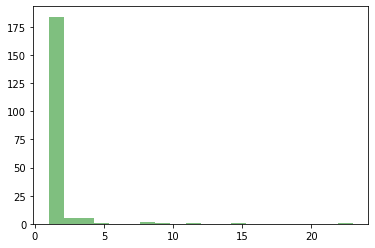

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(word_freq.values(), facecolor='green', alpha=0.5, bins=20)

#### More: A shortest version to count word frequency

In [ ]:
word_freq = {k:words.count(k) for k in set(words)}

#### More:Sorting all pairs of key and value

In [ ]:
import operator
sorted_x = sorted(word_freq.items(), 
                  key=operator.itemgetter(1), 
                  reverse=True)

for k in sorted_x[:6]:
    print(k)

('data', 21)
('and', 11)
('of', 11)
('to', 10)
('the', 7)
('with', 7)


### 案例：成績百分制轉等第制

最近台灣也開始用等第制來給分，一方面是為了符合國際的標準，另一原因據說是為了避免學生對成績太錙銖必較，雖然我自己的感覺是，學生對於為何從A+和A的差別更計較了，甚至會來追問，原始成績是多少，為何會變成A。不過，很多老師在給分還是採用百分制，學校在讓老師上傳成績的時候，就有個選項是可自動把百分制轉為等第制，這個範例是這件事的簡化版，我們只轉出A、B、C和F四種等第。

首先，先造一筆測試資料，分別是75個由35~99間的隨機整數，可重複取出。再來，初始化一個Dictionary來存放每個等第的個數（一開始均為0）。最後，使用if-elif-else條件判斷式來判斷每一筆成績落在哪個區間。


#### Generating grades
先不要管下面怎麼做的，先知道這樣的方式可以產生隨機75個35~99間的數字並儲存到`grades`這個`list`中。

In [23]:
import random
grades  =  [random.randint(35, 100) for i in range(0, 75)]
print("Length of: ", len(grades))
print("Grades: ", " ".join(str(g) for g in grades))

Length of:  75
Grades:  74 37 91 92 40 64 74 56 66 56 35 47 64 73 43 55 73 88 79 69 95 51 43 81 67 96 46 62 45 82 99 97 55 95 62 74 82 55 35 100 59 56 45 99 85 80 57 35 79 64 83 47 96 59 70 66 38 69 78 56 49 43 92 97 95 78 59 69 68 52 48 83 100 56 72


#### Initializing a dict to store the frequency

In [22]:
# Initializing level frequency
grade_dict = {'F':0, "C":0, "B":0, "A":0}

# Counting level frequency
for g in grades:
    if 100 >= g >= 80:
        grade_dict["A"] += 1
    elif 79 >= g >= 72:
        grade_dict["B"] += 1
    elif 71 >= g >= 60:
        grade_dict["C"] += 1
    else:
        grade_dict["F"] += 1
print(grade_dict)

{'F': 23, 'C': 16, 'B': 5, 'A': 31}


## Sort the data by value

前面的教學涵蓋了各種技術方法和Python程式語言的基本邏輯，但回到這個問題本身，尤其是「詞頻」這個議題，通常我們會想問，哪些詞出現的頻率最高、或者哪些種類的物件出現頻率最高。要用數據的方式來解答這個問題最好的方式就是將key-to-value的對應按照value由大到小來排列，這樣就可以知道，是哪些key的出現次數最高，這樣的動作稱為排序（Sorting）。

如果是List的排序很簡單，只需要用`sorted()`這個函式就可以將一個List從小到大或由大而小排序。但Dict是一種Mapping型態，需要照value將key-value對一起排序。注意，此時我們只是希望將排序的結果列印出來而已，不見得要保留原本Dict的資料型態。這樣一共有三種作法如下：

In [33]:
sorted([3, 1, 2, 4, 5, 5, 5, 3, 1], reverse = True)

[5, 5, 5, 4, 3, 3, 2, 1, 1]

### Method 1

先將`fruit_count`用`.items()`這個成員函式轉為tuble型態，tuble第一個位置為key，第二個位置為value。然後在`sorted()`函式中指定用第二個位置（`operator.itemgetter(1)`指的是第二個位置，如果括號中為0指的是第一個位置）來作為排序依據；`reverse=True`的意思是由大而小排序。


In [31]:
import operator
sorted_x = sorted(fruit_count.items(), 
                  key=operator.itemgetter(1), 
                  reverse=True)

for k in sorted_x:
    print(k)

('apple', 4)
('banana', 3)
('grape', 1)


### Method 2

第二種寫法比較簡單，不用先用`items()`轉為tuple的型態，而直接用`.get()`這個Dict的成員函式指定用value來排序（`dict.get()`指的便是key-to-value的value）。

In [ ]:
sorted_keys = sorted(fruit_count, key=fruit_count.get, reverse=True)
print(sorted_keys)

['apple', 'banana', 'grape']


In [25]:
for key in sorted_keys[:2]:
    print(key, fruit_count[key])

apple 4
banana 3


### Method 3

第三種方式是我最愛用的方式，用`Counter()`直接計算個數後，用成員函式`most_common()`直接依照出現個數由大而小輸出。`most_commnon(n)`中可填入一數字，如果是10的話即為前10大。

In [32]:
for f, c in Counter(fruit_list).most_common():
    print(f, c)

apple 4
banana 3
grape 1
